<a href="https://colab.research.google.com/github/nandanaraj/My-Works/blob/main/10_MLR_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
os.getcwd()

'C:\\Users\\T0SHIBA'

In [ ]:
data = pd.read_csv("C:\\Users\\T0SHIBA\\Documents\\IMS Ankur Sir\\Data Sets\\MLR_House_Price.csv")

In [ ]:
data.head()

,price,rooms,income,taxrate,adexpense
0,100646,4.4,47150,1.30,24.84
1,100838,4.4,47150,1.46,24.84
2,92959,4.0,47735,2.94,25.18
3,93431,4.0,47735,3.08,24.77
4,106811,4.4,50990,2.48,7.89


In [ ]:
data.describe()

,price,rooms,income,taxrate,adexpense
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,107061.111111,4.477778,55414.000000,2.707000,16.211667
std,9913.361242,0.240682,4754.929979,0.916026,6.333899
min,91599.000000,4.000000,46085.000000,0.700000,2.800000
25%,100354.750000,4.300000,51785.000000,2.160000,11.480000
50%,105603.000000,4.400000,54245.000000,2.545000,15.930000
75%,112808.750000,4.600000,58760.000000,3.390000,20.702500
max,136952.000000,5.200000,67895.000000,5.340000,28.430000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      90 non-null     int64  
 1   rooms      90 non-null     float64
 2   income     90 non-null     int64  
 3   taxrate    90 non-null     float64
 4   adexpense  90 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.6 KB


## Price is the Dependent Variable  

In [ ]:
data.corr()

,price,rooms,income,taxrate,adexpense
price,1.000000,0.542322,0.425555,-0.383116,-0.335101
rooms,0.542322,1.000000,0.393221,-0.093263,-0.278123
income,0.425555,0.393221,1.000000,-0.042889,-0.197835
taxrate,-0.383116,-0.093263,-0.042889,1.000000,0.146984
adexpense,-0.335101,-0.278123,-0.197835,0.146984,1.000000


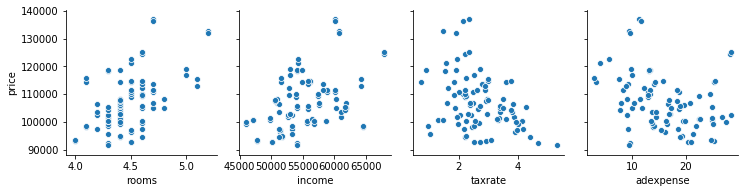

In [ ]:
sns.pairplot(data,x_vars=['rooms','income','taxrate','adexpense'],y_vars=['price'])

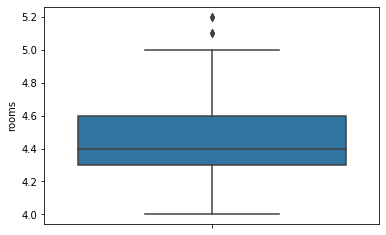

In [ ]:
sns.boxplot(data['rooms'],orient='v')

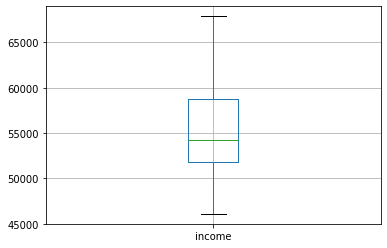

In [ ]:
data.boxplot('income')

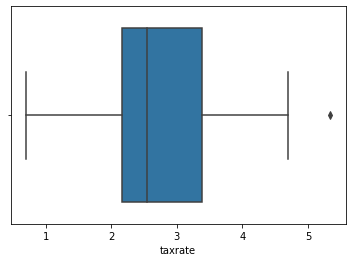

In [ ]:
sns.boxplot(data['taxrate'])

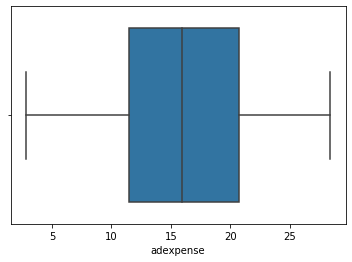

In [ ]:
sns.boxplot(data['adexpense'])

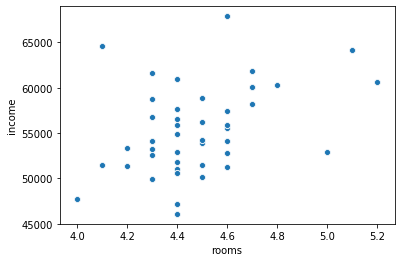

In [ ]:
sns.scatterplot(data['rooms'],data['income'])

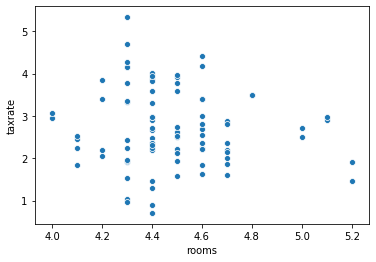

In [ ]:
sns.scatterplot(data['rooms'],data['taxrate'])

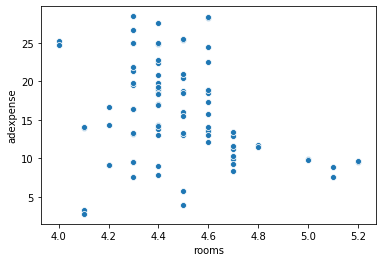

In [ ]:
sns.scatterplot(data['rooms'],data['adexpense'])

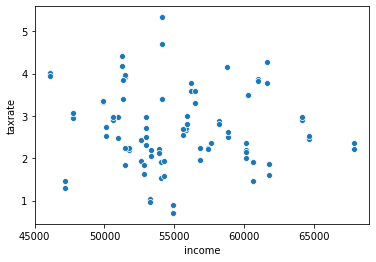

In [ ]:
sns.scatterplot(data['income'],data['taxrate'])

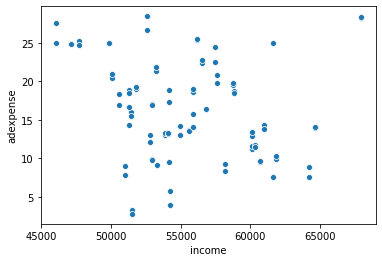

In [ ]:
sns.scatterplot(data['income'],data['adexpense'])

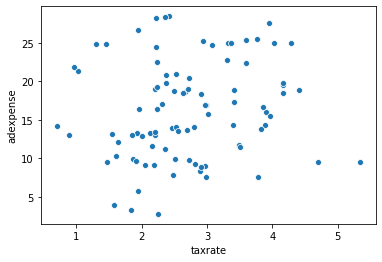

In [ ]:
sns.scatterplot(data['taxrate'],data['adexpense'])

## All Independent Variables Must have a linear relationship with the Dependent  Variable

## There should be no Multicollinarity : The Independent variables should not have correlation among themseleves

# Model 1

In [ ]:
X = data[['rooms','income','taxrate','adexpense']]

In [ ]:
X.head() #2D

,rooms,income,taxrate,adexpense
0,4.4,47150,1.30,24.84
1,4.4,47150,1.46,24.84
2,4.0,47735,2.94,25.18
3,4.0,47735,3.08,24.77
4,4.4,50990,2.48,7.89


In [ ]:
y = data['price']

In [ ]:
y.head() #1D

0    100646
1    100838
2     92959
3     93431
4    106811
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.head()

,rooms,income,taxrate,adexpense
79,4.8,60305,3.50,11.45
5,4.4,50990,2.97,9.01
8,4.5,53915,2.21,13.00
2,4.0,47735,2.94,25.18
16,4.3,53270,1.03,21.30


In [ ]:
X_test.head()

,rooms,income,taxrate,adexpense
33,4.7,60140,2.20,13.39
24,4.3,52625,1.94,26.67
31,4.6,57455,2.22,24.51
28,4.1,64625,2.46,13.92
42,4.7,58205,2.89,8.38


In [ ]:
y_train.head()

79    108168
5     108301
8     109154
2      92959
16     95668
Name: price, dtype: int64

In [ ]:
y_test.head()

33    111602
24    101860
31    110117
28     97996
42    111332
Name: price, dtype: int64

In [ ]:
X_train.shape

(72, 4)

In [ ]:
X_test.shape

(18, 4)

In [ ]:
y_train.shape

(72,)

In [ ]:
y_test.shape

(18,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(X_test)

## Evaluate the Model

In [ ]:
lr.intercept_

16363.325559043355

In [ ]:
lr.coef_

array([ 1.48716860e+04,  6.14451337e-01, -3.00995432e+03, -1.10506217e+02])

In [ ]:
coeff_data = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])

In [ ]:
coeff_data

,Coefficient
rooms,14871.686023
income,0.614451
taxrate,-3009.954317
adexpense,-110.506217


### price = 18717.264+ 16332.359 x rooms + 0.528082 x income + -3865.722935 x taxrate + -190.46 x adexpense

In [ ]:
from sklearn import metrics

In [ ]:
r_squared = metrics.r2_score(y_test,y_predict)

In [ ]:
r_squared

0.5530575164457778

In [ ]:
mse = metrics.mean_squared_error(y_test,y_predict)

In [ ]:
mse

44388588.413401835

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

6662.476147304532

###  Adjusted R square = 1-(1-r_square)* (n-1)/(n-k-1)

In [ ]:
1-((1-r_squared)*(90-1)/(90-4-1))

0.5320249289844027

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features']=X_test.columns
vif['Vif Factor']=[variance_inflation_factor(X_test.values,i) for i in range (X_test.shape[1])]
vif

,features,Vif Factor
0,rooms,143.597434
1,income,133.928557
2,taxrate,8.294397
3,adexpense,6.024481


## Variation Inflation Factor is an indication of Multicolinieraity; We have to remove the variables with VIF above 10

In [ ]:
df = pd.DataFrame(y_test.values,columns=['Original y_test'])
df.head()

,Original y_test
0,111602
1,101860
2,110117
3,97996
4,111332


In [ ]:
df['Predicted y_test']= pd.Series(y_predict)
df['Residuals']=df['Original y_test']-df['Predicted y_test']
df.head()


,Original y_test,Predicted y_test,Residuals
0,111602,115111.775544,-3509.775544
1,101860,103860.564893,-2000.564893
2,110117,110685.776880,-568.776880
3,97996,108103.421761,-10107.421761
4,111332,112399.579876,-1067.579876


## Assumption 3: NO CORRELATION BETWEEN THE RESIDUALS

One way to determine if this assumption is met is to perform a Durbin-watson Test, which is used to detect the presence of auttocorrelation in the residuals of a regression


H0 Null Hypothesis : There is no Correlation among the residuals

HA Alternative Hypothesis : The residuals are correlated


The test statistic is approximately equal to 2^(1-r) where r is the sample autocorrelation of the residuals.Thus thr test statistic will always be between 0 and 4 with the following interpretation:
A test statistic of 2 indicates no serial correlation

            The closer the test statistic is to 0, the more evidence of positive serial correlation

            The closer the test statistic is to 4, the more evidence of negative serial correlation

            As a rule of thumb, test statistics between 1.5 and 2.5 are cosidered as normal



In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
durbin_watson(df['Residuals'])

1.9604049378157558

In [ ]:
lr.predict([[2.2,30000,14,6]])

array([24712.17719097])

## Categorical Variable

In [ ]:
d = pd.read_csv("C:\\Users\\T0SHIBA\\Documents\\IMS Ankur Sir\\Data Sets\\MLR_House_Price_Cat.csv")

In [ ]:
d.head()

,price,rooms,income,taxrate,adexpense,area,garden
0,100646,4.4,47150,1.30,24.84,rural,y
1,100838,4.4,47150,1.46,24.84,urban,n
2,92959,4.0,47735,2.94,25.18,urban,n
3,93431,4.0,47735,3.08,24.77,rural,y
4,106811,4.4,50990,2.48,7.89,urban,y


In [ ]:
d_dummies = pd.get_dummies(d,drop_first=True)

In [ ]:
d_dummies.head()

,price,rooms,income,taxrate,adexpense,area_urban,garden_y
0,100646,4.4,47150,1.30,24.84,0,1
1,100838,4.4,47150,1.46,24.84,1,0
2,92959,4.0,47735,2.94,25.18,1,0
3,93431,4.0,47735,3.08,24.77,0,1
4,106811,4.4,50990,2.48,7.89,1,1


In [ ]:
X = d_dummies[['rooms','income','taxrate','adexpense','area_urban','garden_y']]

In [ ]:
y=d_dummies['price']

In [ ]:
X.head()

,rooms,income,taxrate,adexpense,area_urban,garden_y
0,4.4,47150,1.30,24.84,0,1
1,4.4,47150,1.46,24.84,1,0
2,4.0,47735,2.94,25.18,1,0
3,4.0,47735,3.08,24.77,0,1
4,4.4,50990,2.48,7.89,1,1


In [ ]:
y.head()

0    100646
1    100838
2     92959
3     93431
4    106811
Name: price, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
mlr=LinearRegression()

In [ ]:
mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict =mlr.predict(X_test)

In [ ]:
mlr.coef_

array([ 1.67647664e+04,  4.50461843e-01, -3.53522275e+03, -2.37586897e+02,
       -2.51622232e+03, -4.18439200e+02])

In [ ]:
mlr.intercept_

22283.7105834018

In [ ]:
coefs = pd.DataFrame(mlr.coef_,X_test.columns,columns=['Coefficients'])

In [ ]:
coefs

,Coefficients
rooms,16764.766447
income,0.450462
taxrate,-3535.222745
adexpense,-237.586897
area_urban,-2516.222321
garden_y,-418.439200


In [ ]:
r2score = metrics.r2_score(y_test,y_predict)

In [ ]:
r2score

0.49348566209858535

In [ ]:
mse = metrics.mean_squared_error(y_test,y_predict)
mse

34687050.60617992

In [ ]:
rmse =np.sqrt(mse)
rmse

5889.571343160716

In [ ]:
adjr2=1-((1-r2score)*(90-1)/(90-6-1))
adjr2

0.45687016779245904

In [ ]:
vif = pd.DataFrame()
vif['features']=X_test.columns
vif['Vif Factor']=[variance_inflation_factor(X_test.values,i) for i in range (X_test.shape[1])]
vif

,features,Vif Factor
0,rooms,156.148556
1,income,153.601185
2,taxrate,8.511350
3,adexpense,8.563008
4,area_urban,2.551093
5,garden_y,4.958622


we have to remove rooms and income since the value is greater than 10

In [ ]:
df = pd.DataFrame(y_test.values,columns=['Original y_test'])
df.head()

,Original y_test
0,110679
1,92652
2,100838
3,101021
4,113501


In [ ]:
df['Predicted y_test']= pd.Series(y_predict)
df['Residuals']=df['Original y_test']-df['Predicted y_test']
df.head()


,Original y_test,Predicted y_test,Residuals
0,110679,110940.022677,-261.022677
1,92652,105376.433690,-12724.433690
2,100838,103708.652791,-2870.652791
3,101021,103981.529166,-2960.529166
4,113501,112219.048872,1281.951128


In [ ]:
durbin_watson(df['Residuals'])

2.0162924348105076

# Assumption 4 : The Residuals Should Be Normally Distributed

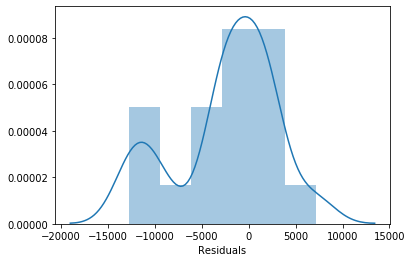

In [ ]:
sns.distplot(df['Residuals'])